In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces


In [3]:
faces=fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\Rahul Dusad\scikit_learn_data


In [4]:
print(faces.DESCR)

Modified Olivetti faces dataset.

The original database was available from

    http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

The version retrieved here comes in MATLAB format from the personal
web page of Sam Roweis:

    http://www.cs.nyu.edu/~roweis/

There are ten different images of each of 40 distinct subjects. For some
subjects, the images were taken at different times, varying the lighting,
facial expressions (open / closed eyes, smiling / not smiling) and facial
details (glasses / no glasses). All the images were taken against a dark
homogeneous background with the subjects in an upright, frontal position (with
tolerance for some side movement).

The original dataset consisted of 92 x 112, while the Roweis version
consists of 64x64 images.



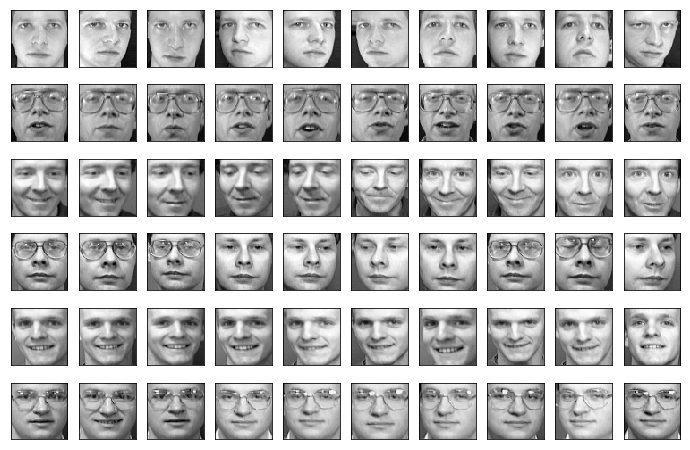

In [5]:
fig, ax=plt.subplots(6,10,figsize=(12,8),subplot_kw=dict(xticks=[],yticks=[]))
for i,axi in enumerate(ax.flat):
    axi.imshow(faces.images[i],cmap='gray')

In [7]:
X=faces.data
Y=faces.target
X.shape , Y.shape

((400, 4096), (400,))

In [8]:
pd.DataFrame(Y).sample(10)

,0
51,5
274,27
353,35
127,12
103,10
145,14
275,27
110,11
22,2
9,0


In [9]:
from sklearn.decomposition import PCA
model=PCA(100).fit(X)

Text(0,0.5,'cummulative variance')

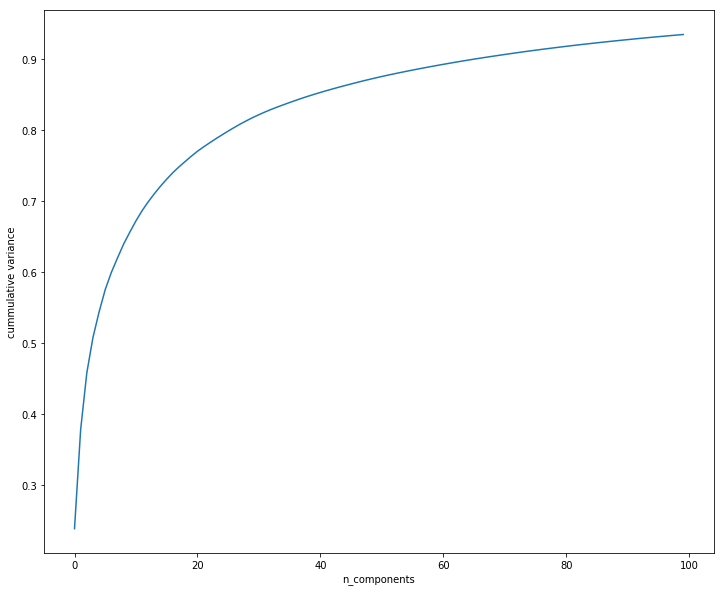

In [10]:
plt.figure(figsize=(12,10))
plt.plot(np.cumsum(model.explained_variance_ratio_))

plt.xlabel('n_components')
plt.ylabel('cummulative variance')

In [21]:
def plot_components(data,X_new,images=None,ax=None ,thumb_frac=0.05,cmap='gray'):
    ax=ax or plt.gca()
    ax.plot(X_new[:,0],X_new[:,1],'-k')
    
    if images is not None:
        min_dist=(thumb_frac*max(X_new.max(0)-X_new.min(0)))**2
        shown_images=np.array([2*X_new.max(0)])
        
        for i in range(data.shape[0]):
            dist=np.sum((X_new[i]-shown_images)**2,1)
            if np.min(dist) < min_dist:
                continue
            
            shown_images=np.vstack([shown_images,X_new[i]])
            imagebox=offsetbox.AnnotationBbox(offsetbox.OffsetImage(images[i],cmap=cmap),X_new)
            ax.add_artist(imagebox)

In [22]:
def apply_manifold_learning(X,method,show_scatter_plot=False):
    X_new=method.fit_transform(X)
    
    print("New shape of x : ",X_new.shape)
    print()
    print("Sample x : \n")
    print(pd.DataFrame(X_new).sample(10))
    print()
    
    if show_scatter_plot is not False:
        fig,ax=plt.subplots(figsize=(12,10))
        ax.scatter(X_new[:,0],X_new[:,1],cmap='Spectral')
        plt.xlabel('X[0] after transformation')
        plt.ylabel("X[1] after transformation")
     
    fig,ax=plt.subplots(figsize=(12,8))
    plot_components(X[:20:],X_new[:20:],images=faces.images[:,::2,::2]) 
    plt.xlabel('Component 1 ')
    plt.ylabel("Component 2")
    
    return method
    
    
    

New shape of x :  (400, 2)

Sample x : 

             0          1
219  12.258480   1.028885
138   3.226059  -6.493688
177  -5.089213  -0.634718
8   -11.024274  -2.965180
199   7.112768  -4.994203
276   0.311448  -9.150480
46   -1.585339  -1.074984
73    4.434221 -13.849056
214  12.327641  -1.140164
315  -4.193663  -9.618922



NameError: name 'offsetbox' is not defined

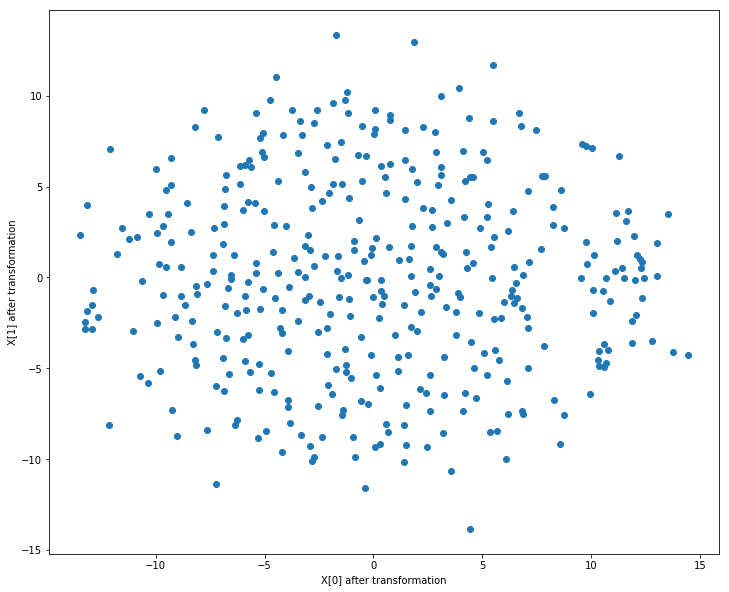

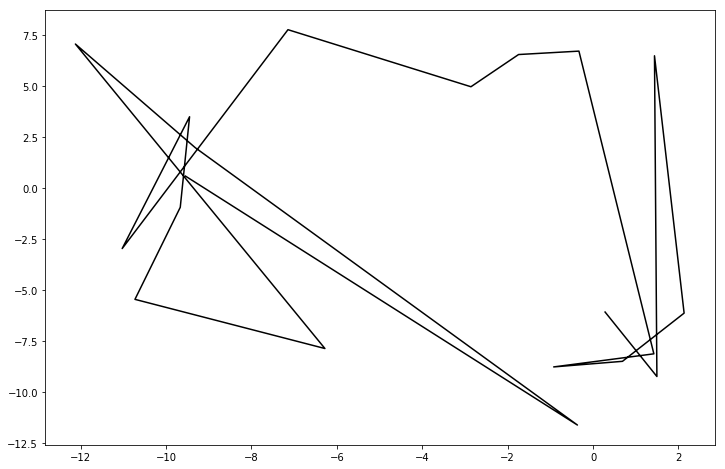

In [23]:
from sklearn.manifold import MDS
mds=apply_manifold_learning(X,MDS(n_components=2,metric=True,n_init=1,max_iter=100),show_scatter_plot=True)